# 14.3a: Center-of-Mass Frame Analysis

**Statistical mechanics of the primordial atom**

## The Question

How do dead tokens stay coherent in the early training steps despite having velocities ~130× the typical separation scale?

**Hypothesis**: The primordial atom moves *coherently*—all tokens receive similar gradients, so they move together as a rigid body. The apparent high velocity is mostly **bulk motion** (translation of the atom as a whole), not **thermal motion** (internal random motion).

## What We Test

1. **Bulk vs thermal velocity**: Is $v_{\text{bulk}} \gg v_{\text{thermal}}$ early on?
2. **True temperature**: $T(t) = \langle v_{\text{thermal}}^2 \rangle$ (mean squared velocity in center-of-mass frame)
3. **Centroid trajectory**: Where does the primordial atom go?
4. **Internal spread**: Does the atom expand or contract over time?

## Data Source

Uses kinematics computed by 14.2a from the 10,000-step instrumented run.

## Parameters

In [1]:
# Data
DATA_PATH = "../data/instrumented_run/dead_token_kinematics.safetensors"

# Visualization
DPI = 200

RANDOM_SEED = 42

## Imports

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from safetensors.torch import load_file

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

print("✓ Imports complete")

✓ Imports complete


## Load Data

In [3]:
print(f"Loading: {DATA_PATH}")

data = load_file(DATA_PATH)

recorded_steps = data['recorded_steps'].numpy()
dead_token_ids = data['dead_token_ids'].tolist()
positions = data['positions']  # [n_recorded, n_dead, hidden_dim]
centroid = data['centroid']  # [n_recorded, hidden_dim]
bulk_velocity = data['bulk_velocity']  # [n_recorded, hidden_dim]
thermal_velocities = data['thermal_velocities']  # [n_recorded, n_dead, hidden_dim]

n_recorded = len(recorded_steps)
n_dead = len(dead_token_ids)

print(f"\n  Recorded steps: {n_recorded}")
print(f"  Step range: {recorded_steps[0]} to {recorded_steps[-1]}")
print(f"  Dead tokens: {n_dead}")
print(f"\n✓ Data loaded")

Loading: ../data/instrumented_run/dead_token_kinematics.safetensors

  Recorded steps: 10001
  Step range: 0 to 10001
  Dead tokens: 51

✓ Data loaded


## Compute Velocity Statistics

In [4]:
print("Computing velocity statistics...")

# Bulk velocity magnitude (L2 norm)
bulk_vel_magnitude = torch.norm(bulk_velocity, p=2, dim=1).numpy()  # [n_recorded]

# Thermal velocity magnitudes for each token
thermal_vel_magnitudes = torch.norm(thermal_velocities, p=2, dim=2).numpy()  # [n_recorded, n_dead]

# RMS thermal velocity (sqrt of mean squared)
thermal_rms = np.sqrt((thermal_vel_magnitudes**2).mean(axis=1))  # [n_recorded]

# Temperature (mean squared thermal velocity)
temperature = (thermal_vel_magnitudes**2).mean(axis=1)  # [n_recorded]

print(f"✓ Velocity statistics computed")

Computing velocity statistics...
✓ Velocity statistics computed


## Compute Spatial Statistics

In [5]:
print("Computing spatial statistics...")

# Centroid norm over time
centroid_norm = torch.norm(centroid, p=2, dim=1).numpy()  # [n_recorded]

# Positions relative to centroid
relative_positions = positions - centroid.unsqueeze(1)  # [n_recorded, n_dead, hidden_dim]

# Mean distance from centroid ("radius" of primordial atom)
distances_from_centroid = torch.norm(relative_positions, p=2, dim=2).numpy()  # [n_recorded, n_dead]
mean_radius = distances_from_centroid.mean(axis=1)  # [n_recorded]

print(f"✓ Spatial statistics computed")

Computing spatial statistics...
✓ Spatial statistics computed


## Plot 1: Bulk vs Thermal Velocity

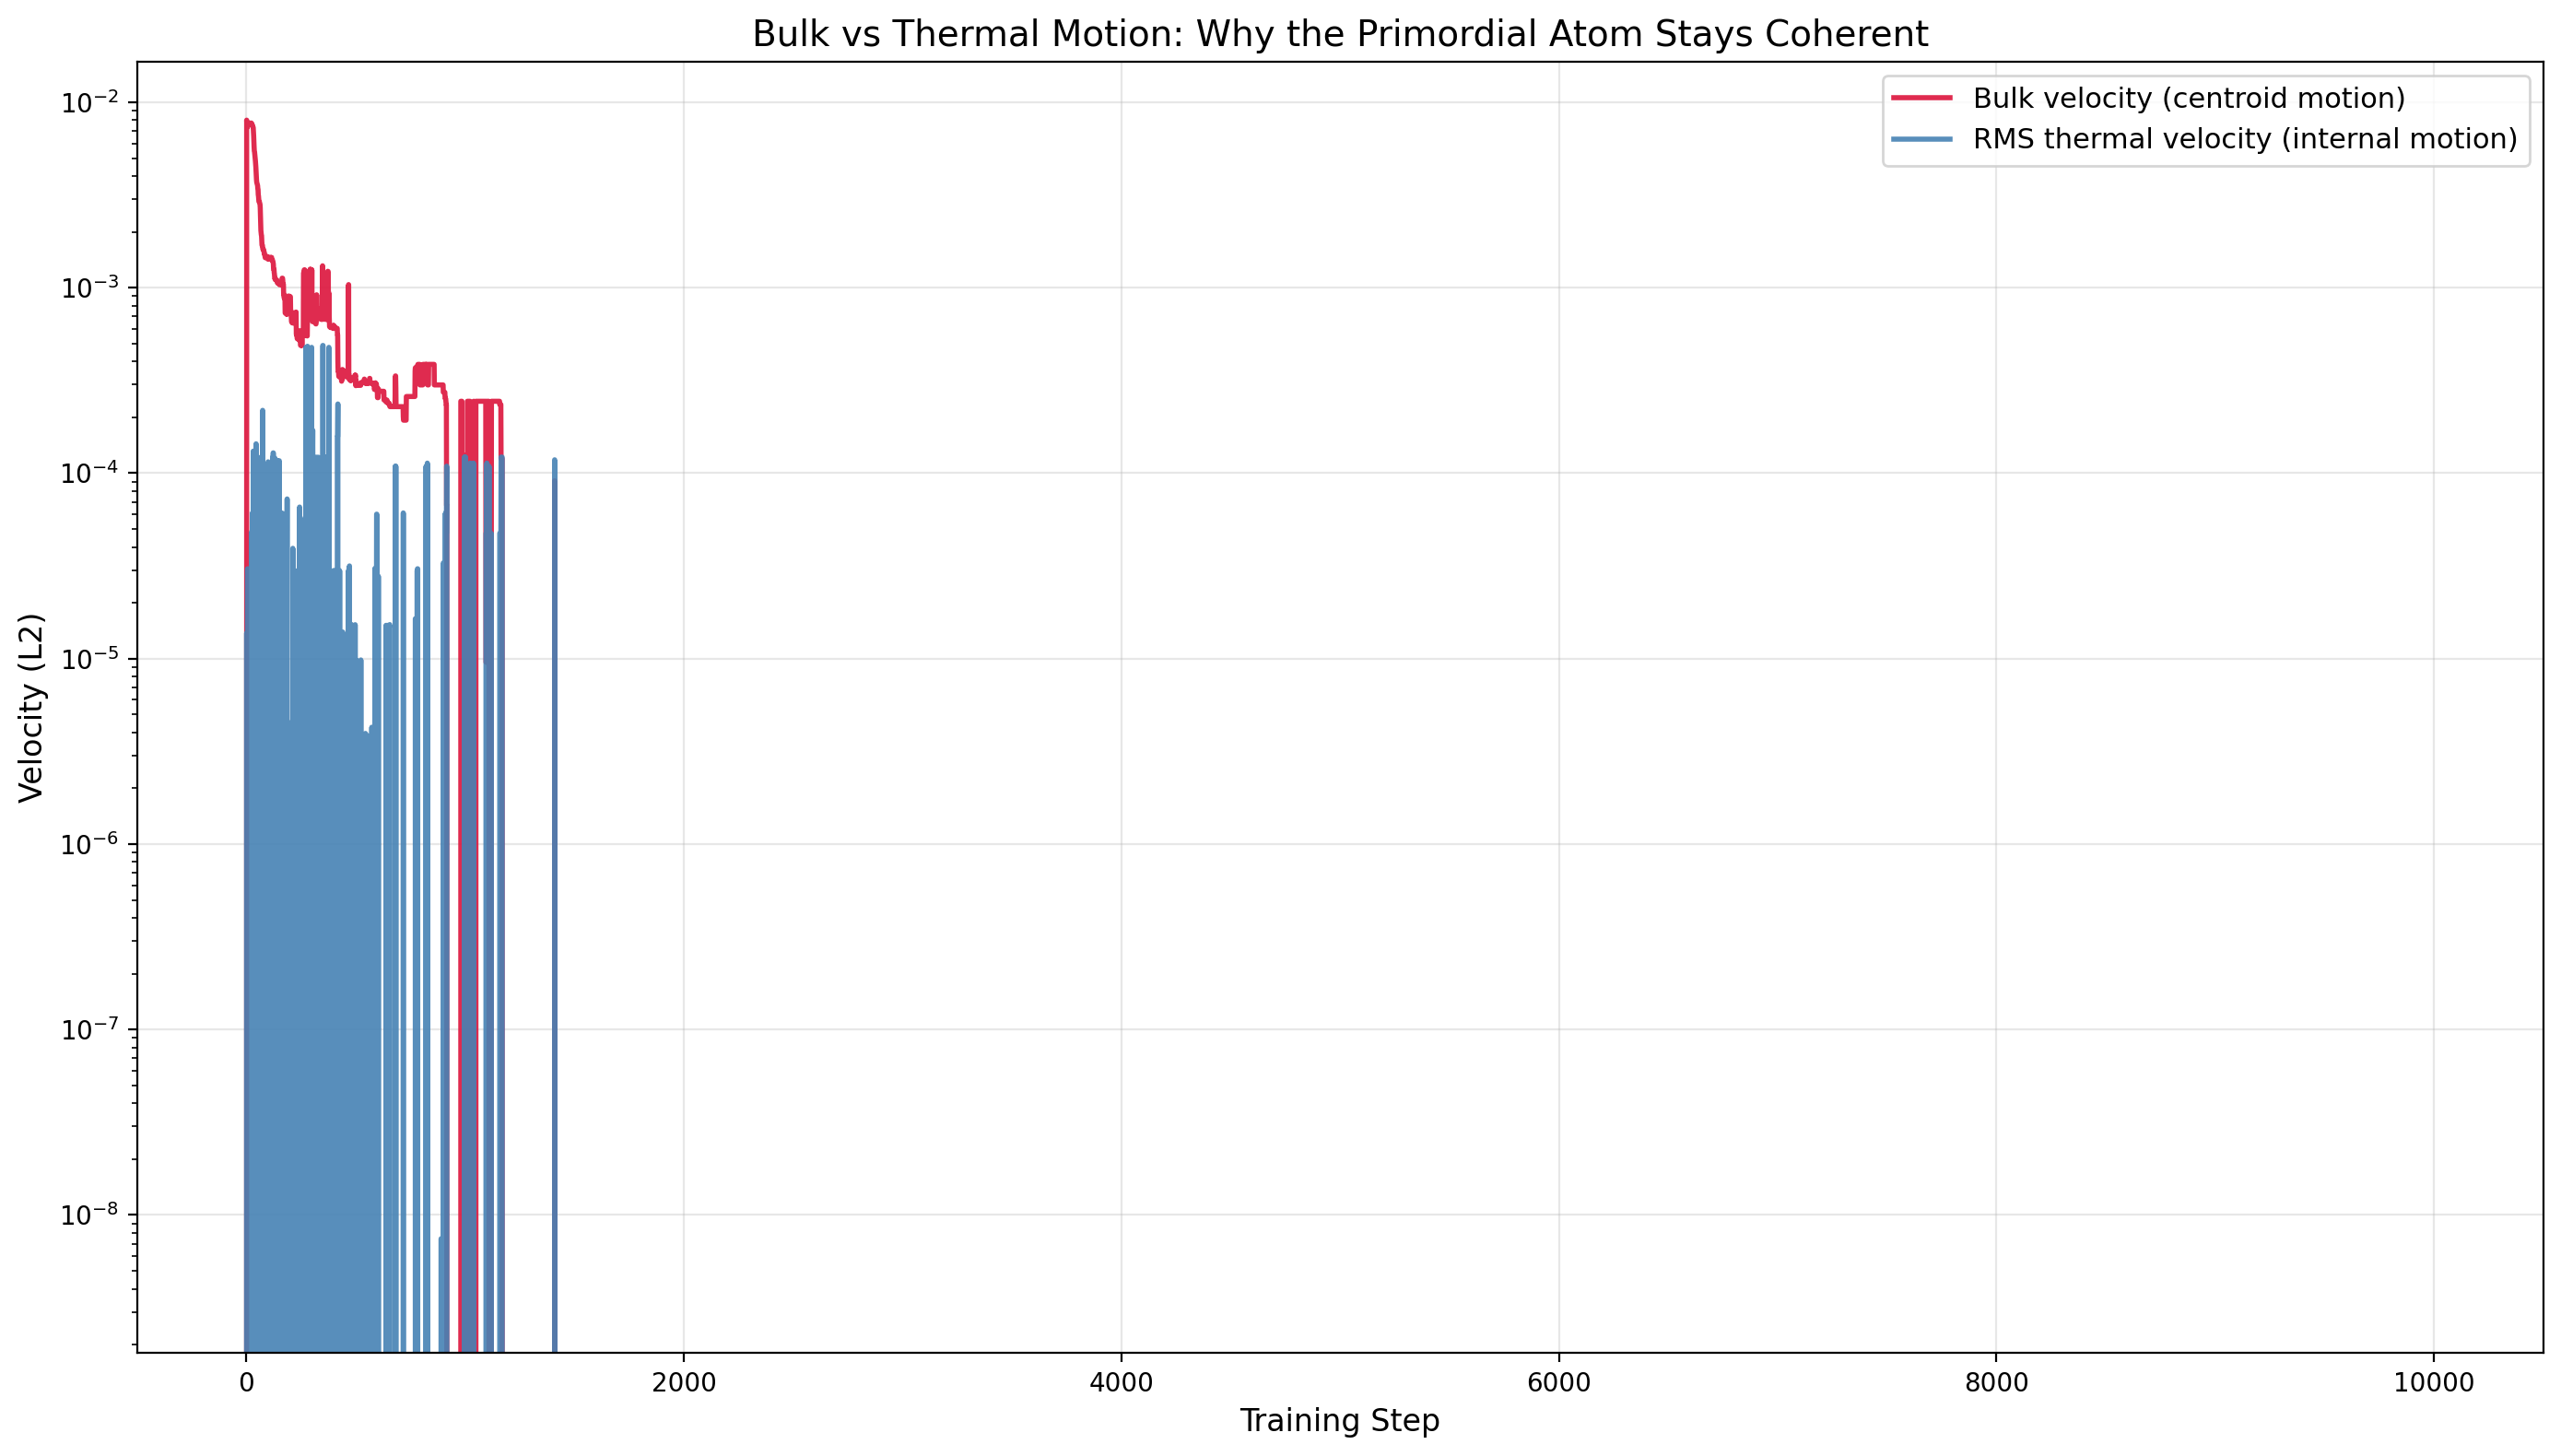


✓ Bulk vs thermal plot complete


In [6]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=DPI)

ax.plot(recorded_steps, bulk_vel_magnitude, linewidth=2, color='crimson', 
        label='Bulk velocity (centroid motion)', alpha=0.9)
ax.plot(recorded_steps, thermal_rms, linewidth=2, color='steelblue', 
        label='RMS thermal velocity (internal motion)', alpha=0.9)

ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('Velocity (L2)', fontsize=12)
ax.set_title('Bulk vs Thermal Motion: Why the Primordial Atom Stays Coherent', fontsize=14)
ax.legend(loc='best', fontsize=11)
ax.grid(alpha=0.3)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

print(f"\n✓ Bulk vs thermal plot complete")

## Plot 2: Temperature in Center-of-Mass Frame

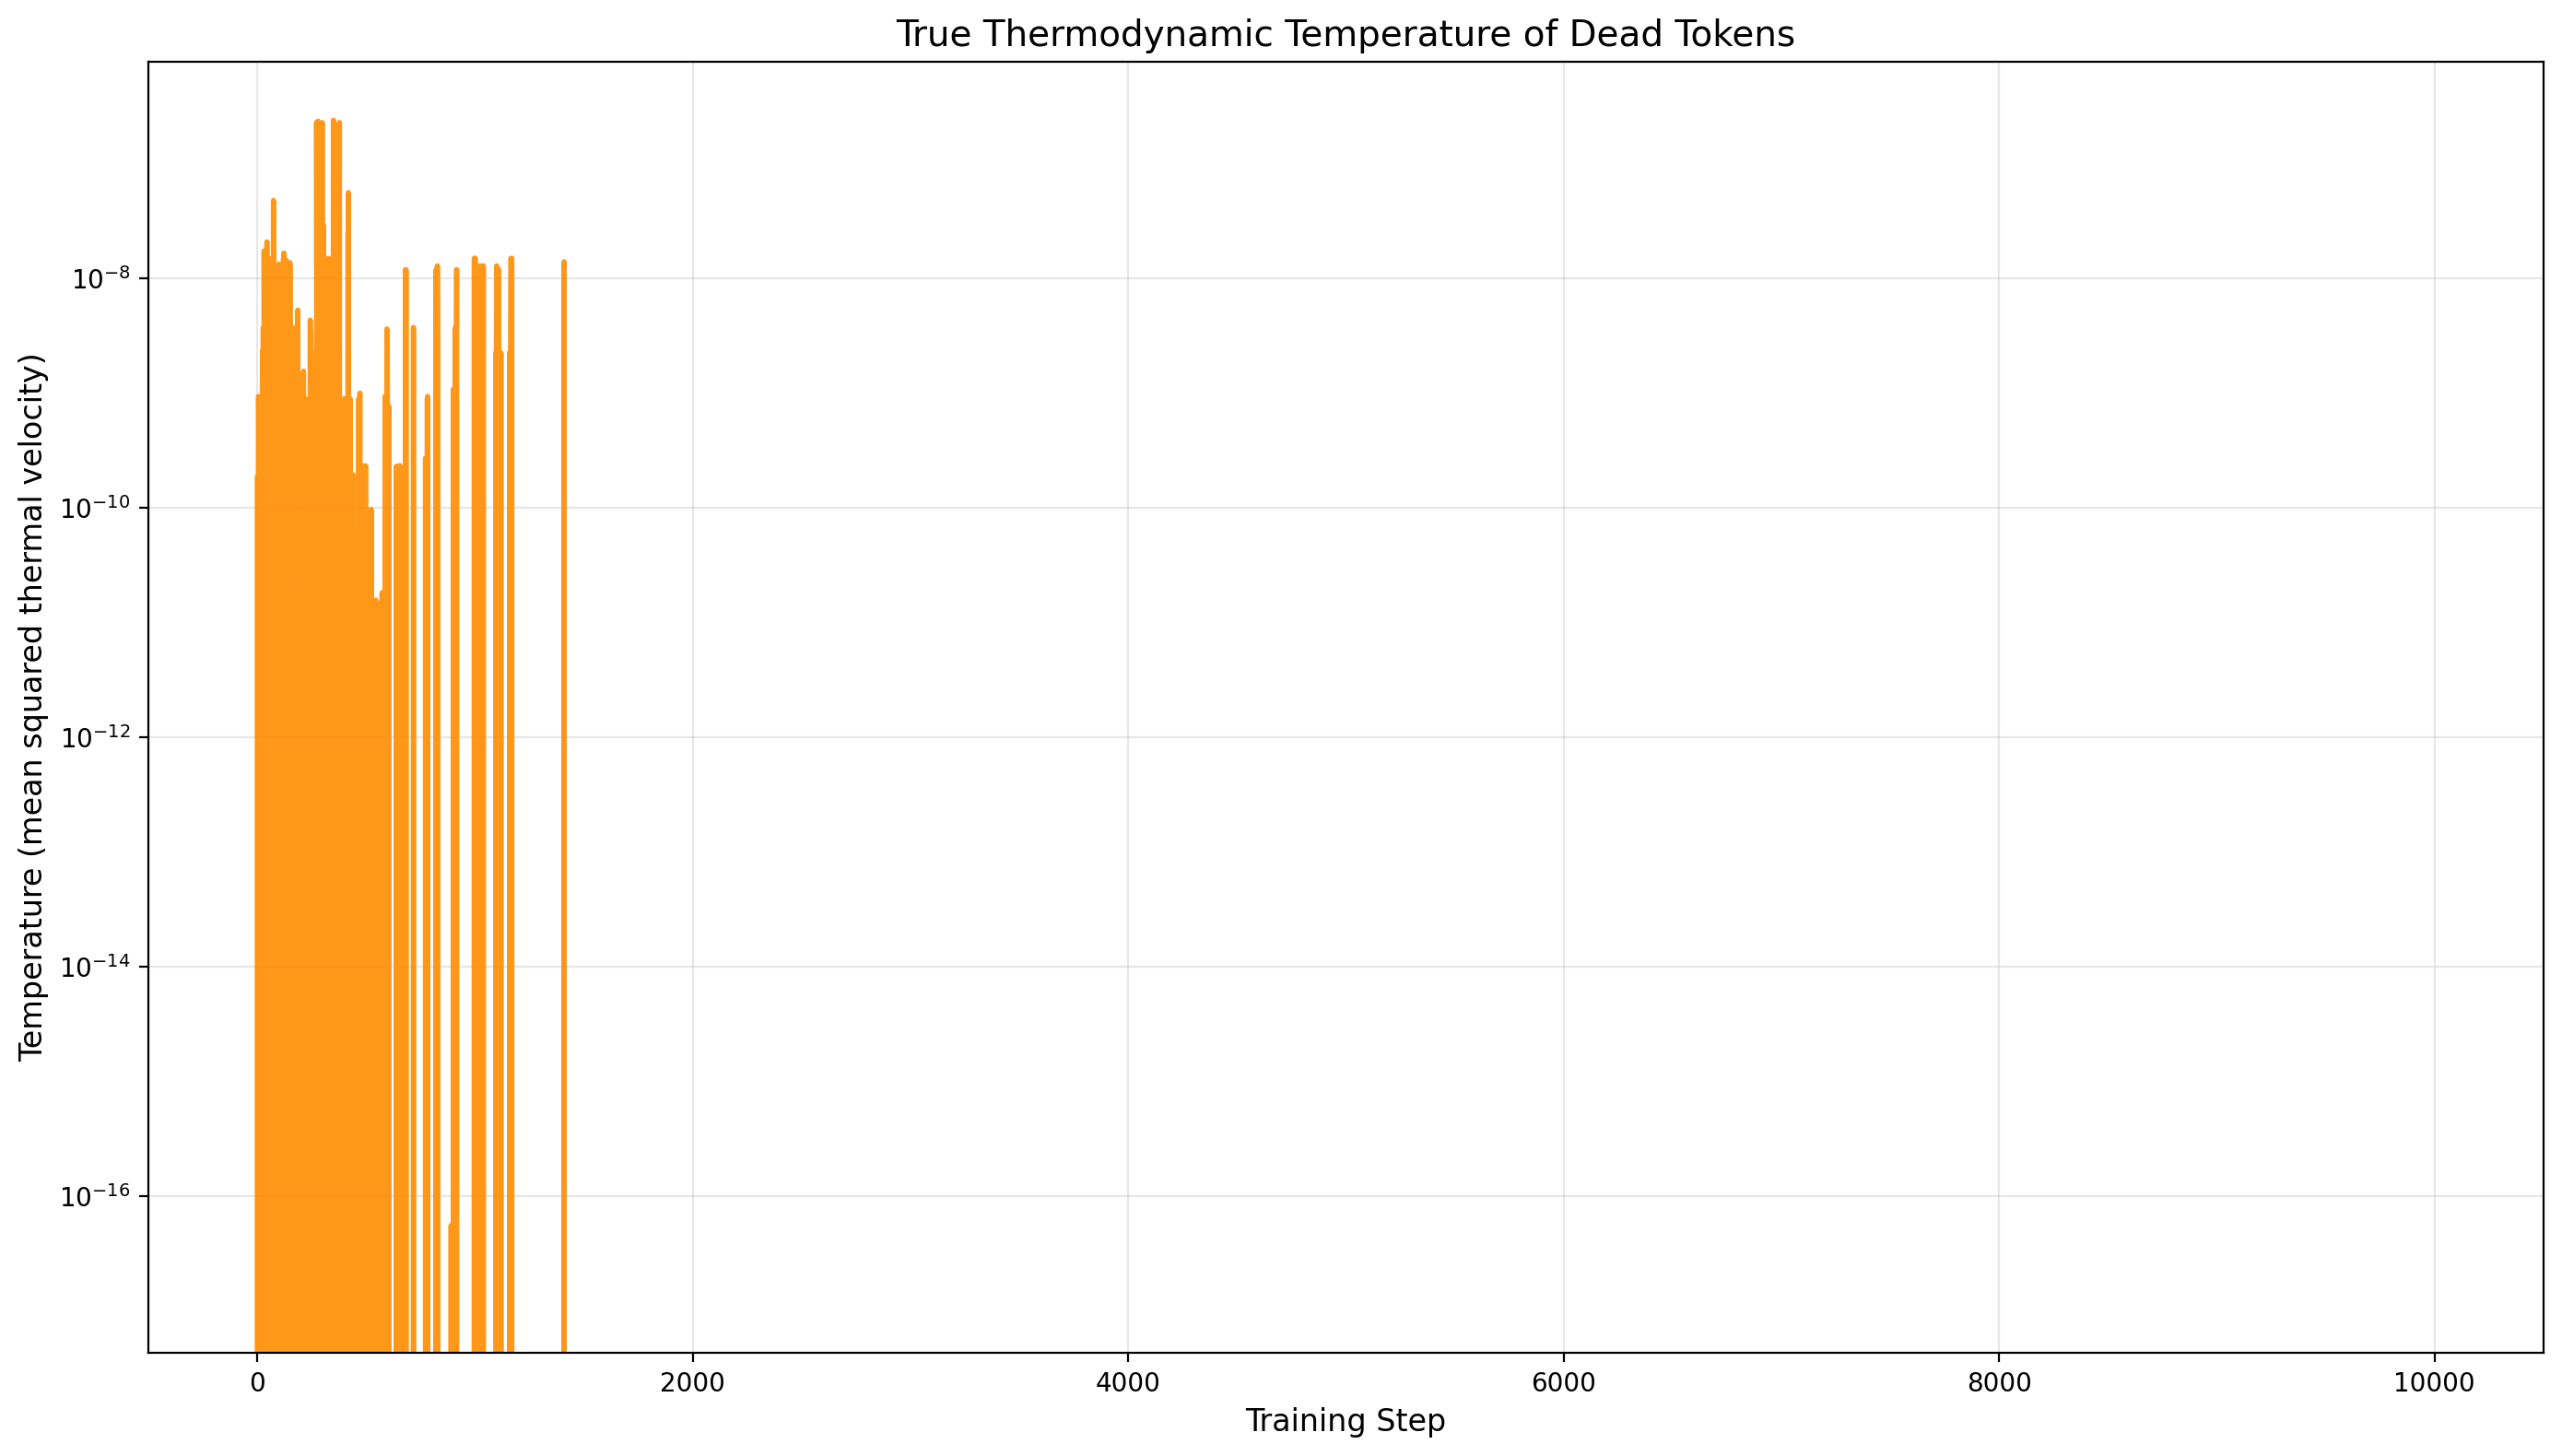


✓ Temperature plot complete


In [7]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=DPI)

ax.plot(recorded_steps, temperature, linewidth=2, color='darkorange', alpha=0.9)

ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('Temperature (mean squared thermal velocity)', fontsize=12)
ax.set_title('True Thermodynamic Temperature of Dead Tokens', fontsize=14)
ax.grid(alpha=0.3)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

print(f"\n✓ Temperature plot complete")

## Plot 3: Centroid Trajectory (Norm Over Time)

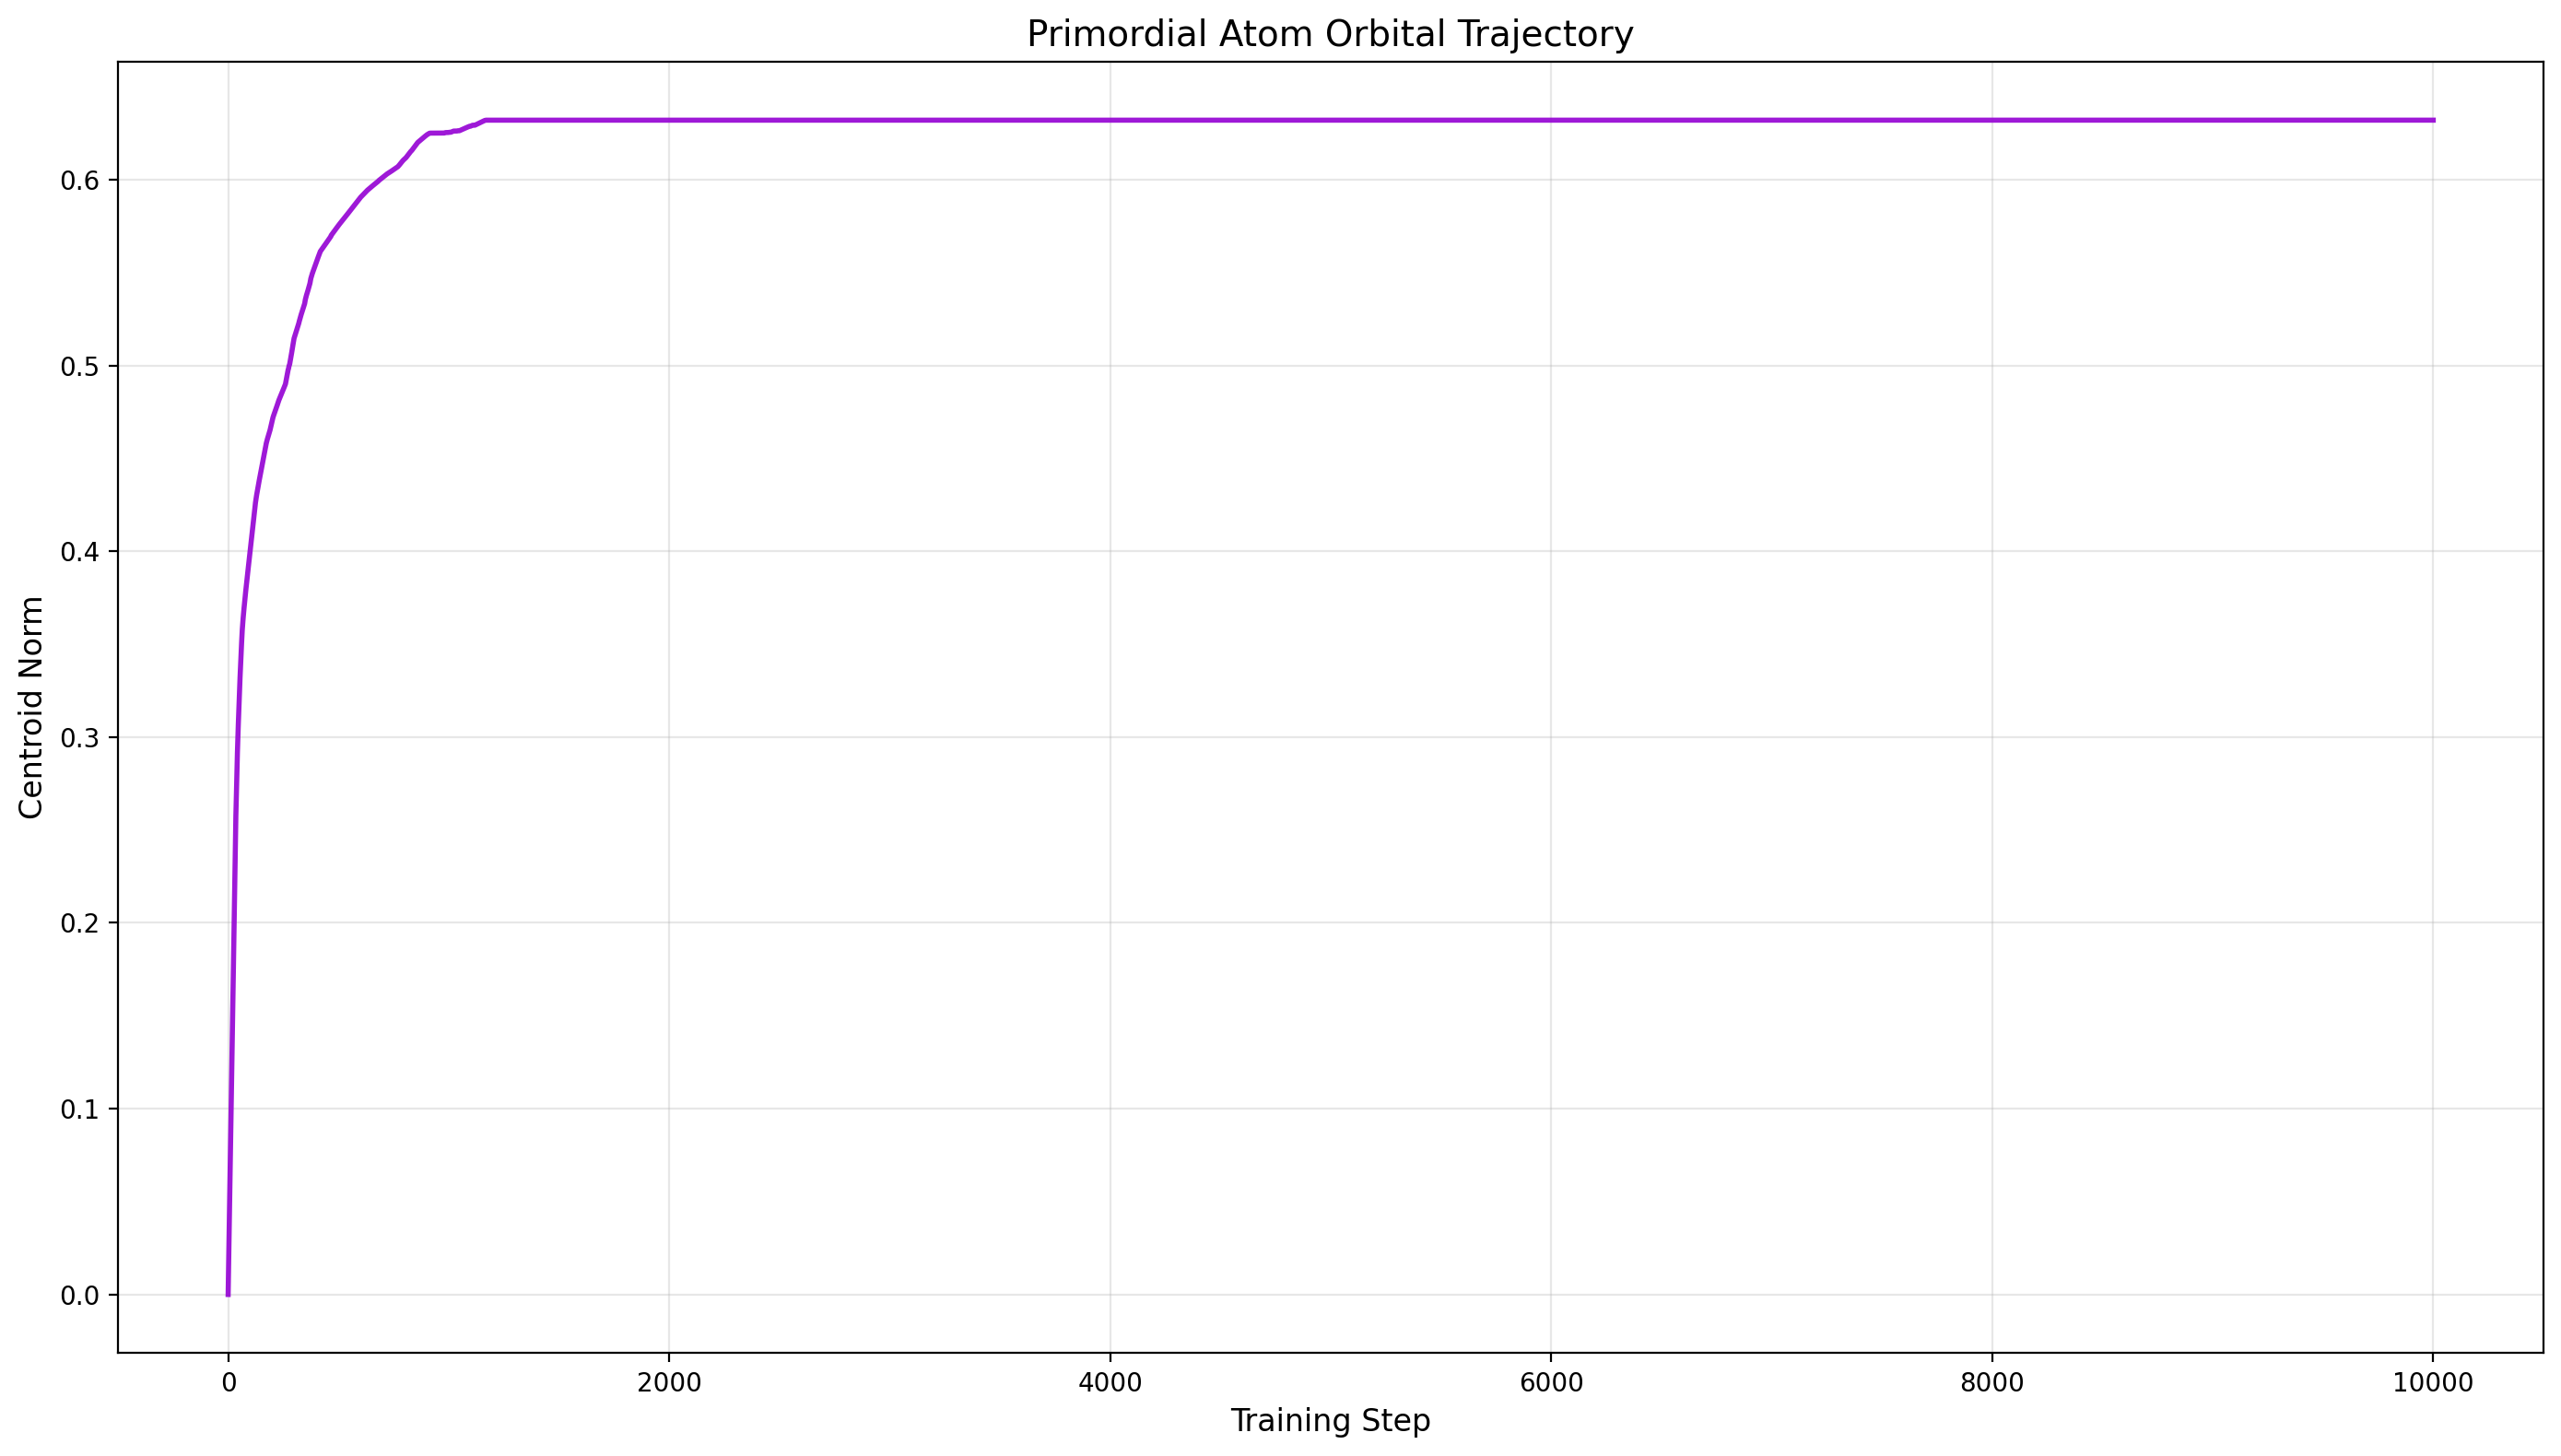


✓ Centroid trajectory plot complete


In [8]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=DPI)

ax.plot(recorded_steps, centroid_norm, linewidth=2, color='darkviolet', alpha=0.9)

ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('Centroid Norm', fontsize=12)
ax.set_title('Primordial Atom Orbital Trajectory', fontsize=14)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Centroid trajectory plot complete")

## Plot 4: Internal Spread (Radius of Primordial Atom)

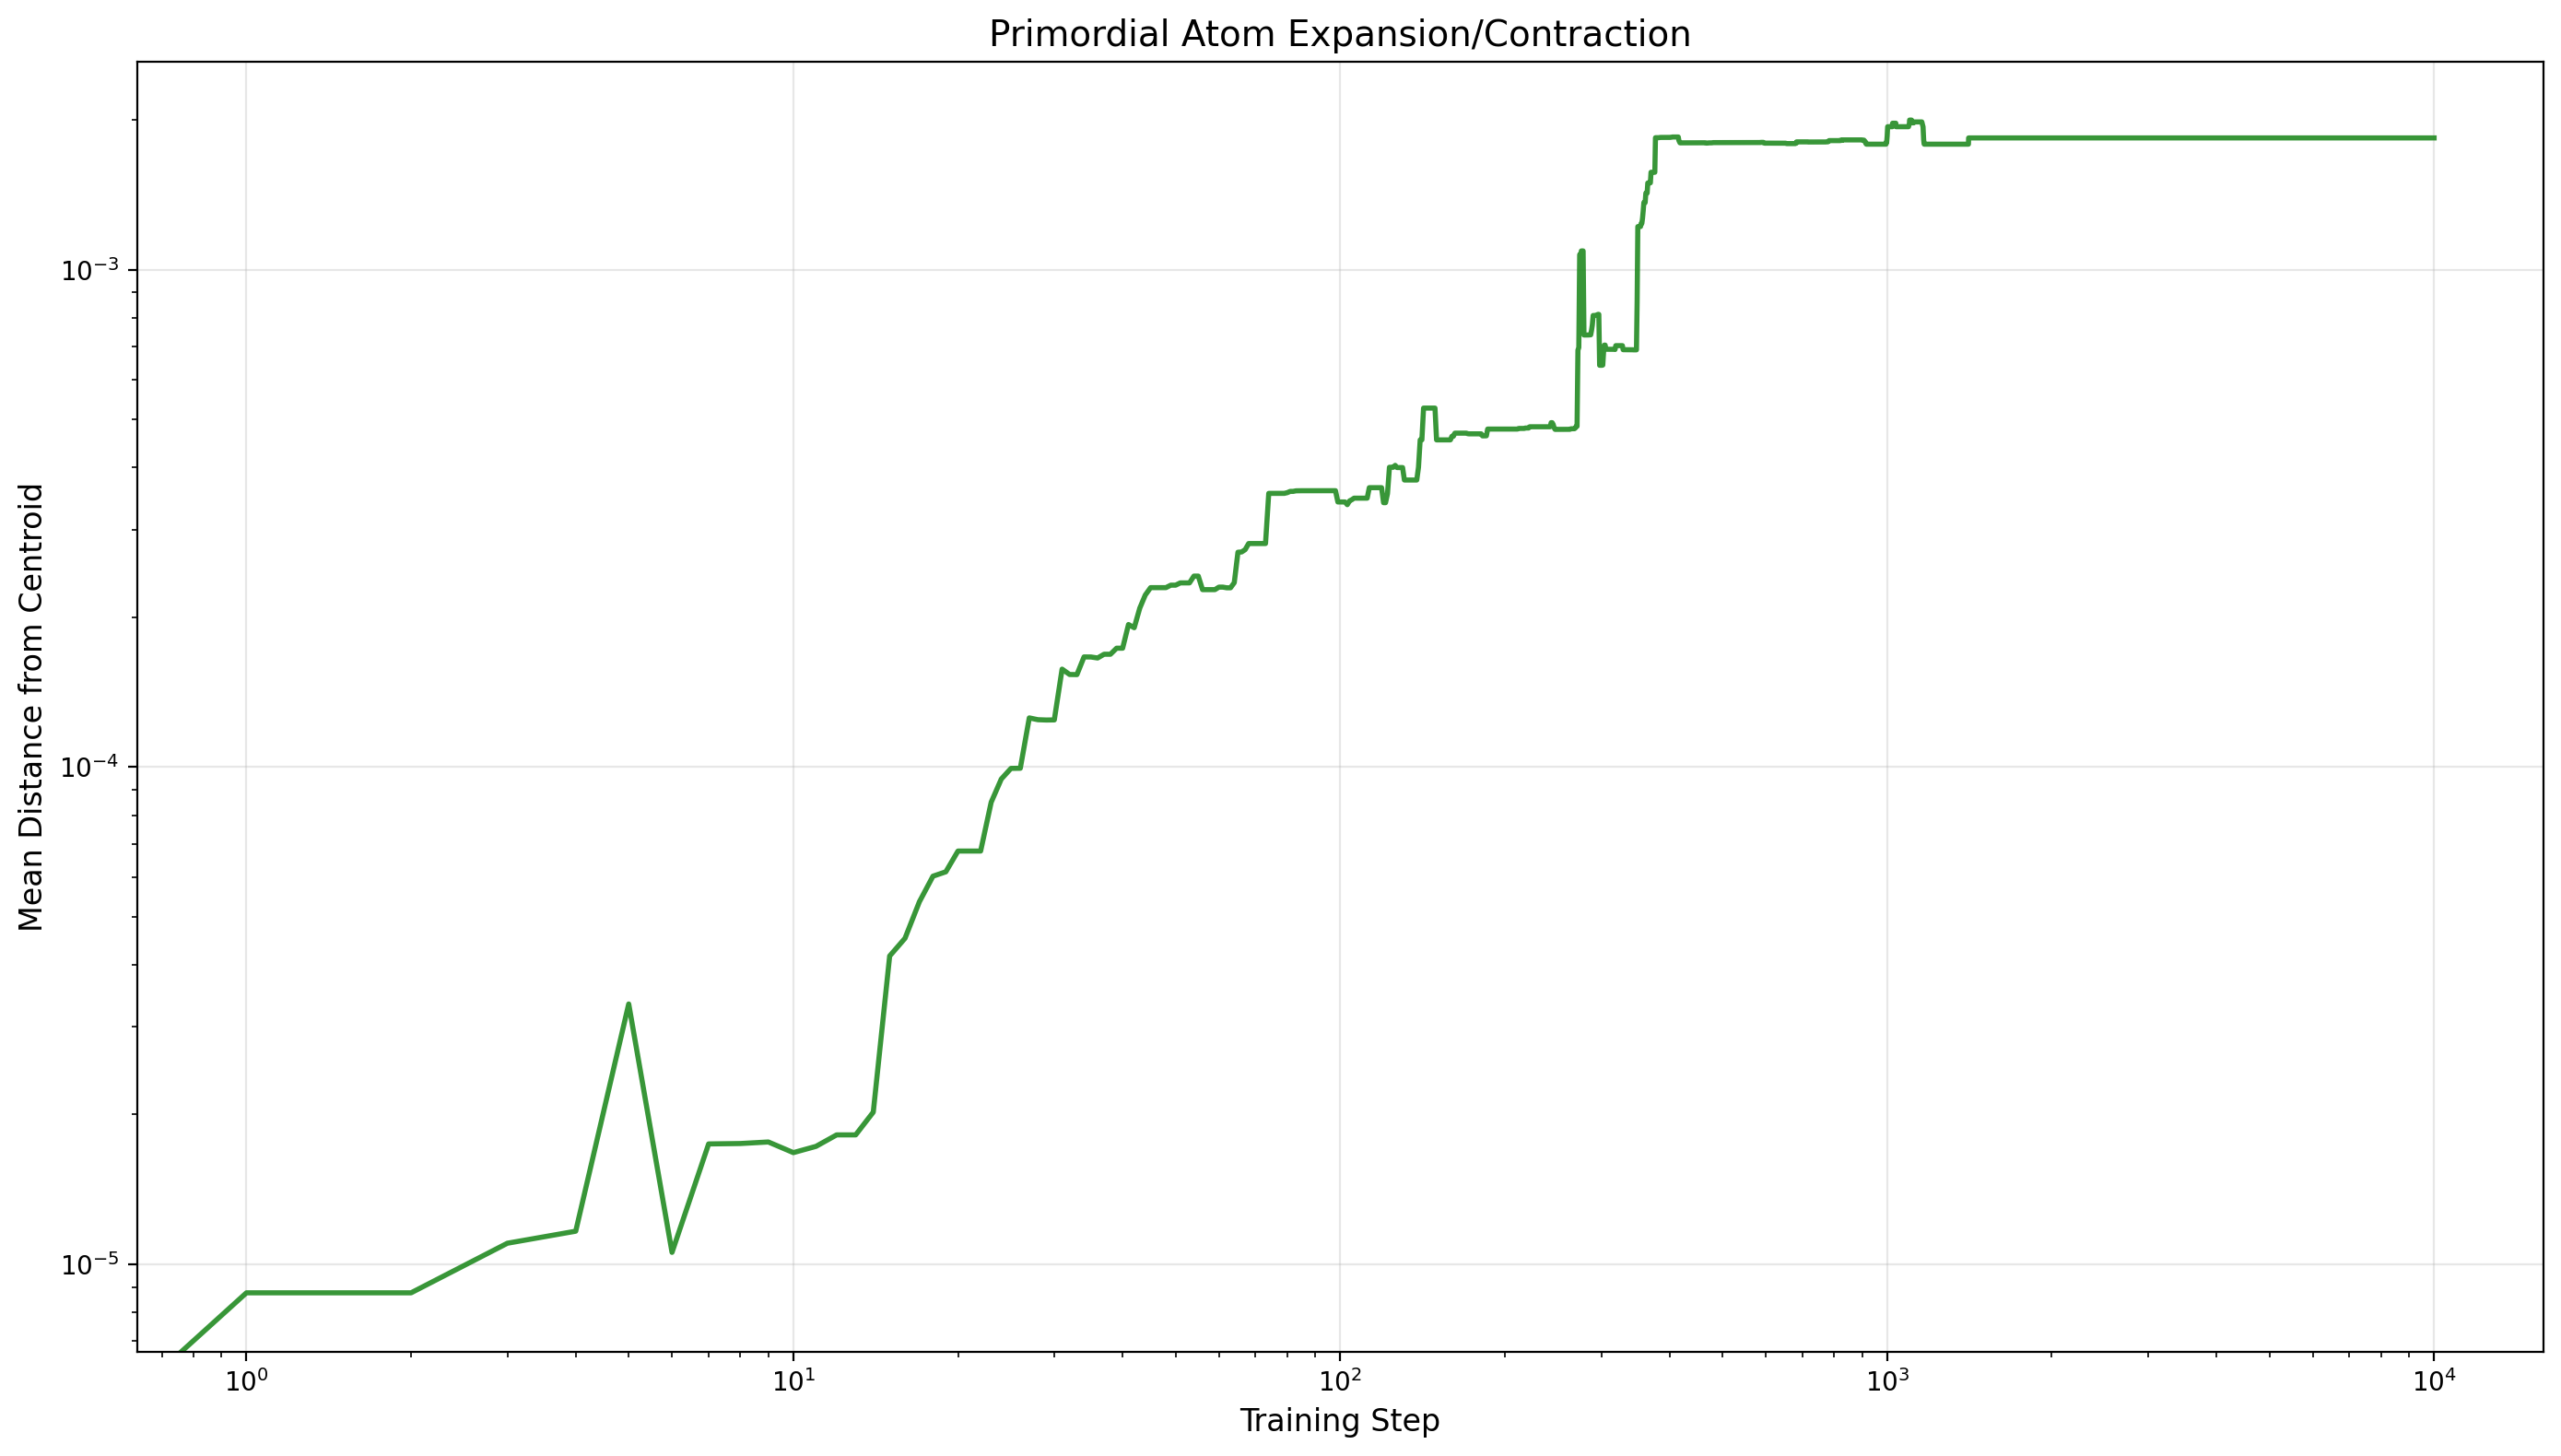


✓ Spread plot complete


In [9]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=DPI)

ax.plot(recorded_steps, mean_radius, linewidth=2, color='forestgreen', alpha=0.9)

ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('Mean Distance from Centroid', fontsize=12)
ax.set_title('Primordial Atom Expansion/Contraction', fontsize=14)
ax.grid(alpha=0.3)
ax.set_yscale('log')
ax.set_xscale('log')

plt.tight_layout()
plt.show()

print(f"\n✓ Spread plot complete")

## Statistics

In [10]:
print(f"\n{'='*80}")
print(f"CENTER-OF-MASS FRAME STATISTICS")
print(f"{'='*80}\n")

print(f"Velocity comparison at t=0:")
print(f"  Bulk velocity: {bulk_vel_magnitude[0]:.6e}")
print(f"  RMS thermal velocity: {thermal_rms[0]:.6e}")
print(f"  Ratio (bulk/thermal): {bulk_vel_magnitude[0] / thermal_rms[0]:.2f}")
print(f"  → Primordial atom moves {'coherently' if bulk_vel_magnitude[0] / thermal_rms[0] > 5 else 'thermally'}\n")

print(f"Temperature evolution:")
print(f"  Initial temperature: {temperature[0]:.6e}")
print(f"  Final temperature: {temperature[-1]:.6e}")
print(f"  Cooling ratio: {temperature[-1] / temperature[0]:.6e}")
print(f"  Temperature at step 100: {temperature[100]:.6e}")
print(f"  Temperature at step 1000: {temperature[1000]:.6e}\n")

print(f"Centroid trajectory:")
print(f"  Initial norm: {centroid_norm[0]:.6f}")
print(f"  Final norm: {centroid_norm[-1]:.6f}")
print(f"  Min norm: {centroid_norm.min():.6f} (step {recorded_steps[centroid_norm.argmin()]})")
print(f"  Max norm: {centroid_norm.max():.6f} (step {recorded_steps[centroid_norm.argmax()]})\n")

print(f"Primordial atom radius:")
print(f"  Initial radius: {mean_radius[0]:.6e}")
print(f"  Final radius: {mean_radius[-1]:.6e}")
print(f"  Max radius: {mean_radius.max():.6e} (step {recorded_steps[mean_radius.argmax()]})")
print(f"  Expansion ratio: {mean_radius[-1] / mean_radius[0]:.2f}")

print(f"\n{'='*80}")


CENTER-OF-MASS FRAME STATISTICS

Velocity comparison at t=0:
  Bulk velocity: 0.000000e+00
  RMS thermal velocity: 0.000000e+00
  Ratio (bulk/thermal): nan
  → Primordial atom moves thermally

Temperature evolution:
  Initial temperature: 0.000000e+00
  Final temperature: 0.000000e+00
  Cooling ratio: nan
  Temperature at step 100: 0.000000e+00
  Temperature at step 1000: 1.489543e-08

Centroid trajectory:
  Initial norm: 0.000000
  Final norm: 0.632026
  Min norm: 0.000000 (step 0)
  Max norm: 0.632026 (step 1409)

Primordial atom radius:
  Initial radius: 0.000000e+00
  Final radius: 1.841447e-03
  Max radius: 2.000144e-03 (step 1099)
  Expansion ratio: inf



/var/folders/k5/44vd1ct56xj4y9h7x213kvjr0000gn/T/ipykernel_98303/4093737524.py:8: RuntimeWarning: invalid value encountered in scalar divide
  print(f"  Ratio (bulk/thermal): {bulk_vel_magnitude[0] / thermal_rms[0]:.2f}")
/var/folders/k5/44vd1ct56xj4y9h7x213kvjr0000gn/T/ipykernel_98303/4093737524.py:9: RuntimeWarning: invalid value encountered in scalar divide
  print(f"  → Primordial atom moves {'coherently' if bulk_vel_magnitude[0] / thermal_rms[0] > 5 else 'thermally'}\n")
/var/folders/k5/44vd1ct56xj4y9h7x213kvjr0000gn/T/ipykernel_98303/4093737524.py:14: RuntimeWarning: invalid value encountered in scalar divide
  print(f"  Cooling ratio: {temperature[-1] / temperature[0]:.6e}")
/var/folders/k5/44vd1ct56xj4y9h7x213kvjr0000gn/T/ipykernel_98303/4093737524.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"  Expansion ratio: {mean_radius[-1] / mean_radius[0]:.2f}")


## Interpretation

**Key questions:**

1. **Why doesn't the primordial atom explode?**
   - If bulk >> thermal early on, then high velocities are mostly coherent motion
   - Atom moves as rigid body, internal "temperature" is much lower

2. **How does temperature evolve?**
   - Should decay exponentially as gradients weaken
   - Eventually drops below quantization threshold → freeze

3. **Where does the primordial atom go?**
   - We've seen before: starts at norm ~1, dips toward origin, then drifts
   - Weight decay pulls toward origin, gradient noise causes random walk

4. **Does the atom expand or contract?**
   - Early: might expand as tokens spread out
   - Late: might contract as they cluster into black holes